<div style="background-color:#0D1B2A; color:white; padding:15px; border-radius:10px;">
  <h1 style="text-align:center;">🏦 Banka Müşteri Kaybı (Churn) Tahmini</h1>
  <p style="text-align:center;">Makine Öğrenimi ile Müşteri Kaybı Tahmini</p>
</div>


<div style="
    border-radius: 18px;
    padding: 30px 40px;
    text-align: center;
    background: linear-gradient(135deg, #b8860b, #8b6508);
    color: #fceec7;
    font-family: Arial, sans-serif;
    width: 70%;
    margin: auto;
    box-shadow: 0 4px 18px rgba(0,0,0,0.25);
">

<h1 style="font-size: 36px; margin-bottom: 8px;">Mesut Karagöz</h1>

<h2 style="font-size: 22px; font-weight: 500; margin-top: 0;">
Data Analyst | Data Scientist
</h2>

<div style="margin-top: 25px; display: flex; justify-content: center; gap: 20px;">

  <a href="https://www.linkedin.com/in/mesut-karagöz-181733260/" target="_blank" style="
      text-decoration:none;
      background:#0072b1;
      color:white;
      padding:12px 26px;
      border-radius:10px;
      font-size:17px;
      display:inline-block;">
      LinkedIn
  </a>
  <a href="https://github.com/Mst-KrgZ" target="_blank" style="
      text-decoration:none;
      background:#24292e;
      color:white;
      padding:12px 26px;
      border-radius:10px;
      font-size:17px;
      display:inline-block;">
      GitHub
  </a>

</div>

</div>

<div style="
    border-left: 6px solid #1F6FEB;
    background: #0d1117;
    padding: 20px 25px;
    border-radius: 8px;
    color:white;
    font-family: Arial, sans-serif;
">
    <h2 style="margin-top: 0;">📌 Giriş</h2>
    <p style="font-size: 16px; line-height: 1.6;">
        Müşteri kaybı (churn), bankacılık sektöründeki en kritik problemlerden biridir. <br>
        Bankadan ayrılma ihtimali yüksek olan müşterilerin belirlenmesi, kurumların 
        müşteri memnuniyetini artırmak ve finansal kayıpları azaltmak için proaktif 
        adımlar atmasını sağlar.
        <br><br>
        Bu projede, banka müşteri verilerini analiz etmek ve bir müşterinin 
        bankadan ayrılıp ayrılmayacağını tahmin etmek için Makine Öğrenimi 
        tekniklerini kullanıyoruz.
    </p>
</div>


<div style="
    border-left: 6px solid #1F6FEB;
    background: #0d1117;
    padding: 20px 25px;
    border-radius: 8px;
    color:white;
    font-family: Arial, sans-serif;
">
    <h2 style="margin-top: 0;">🎯 Proje Hedefleri</h2>
    <p style="font-size: 16px; line-height: 1.6;">
        - Müşteri davranış kalıplarını analiz etmek <br>
        - Keşifsel Veri Analizi (EDA) gerçekleştirmek <br>
        - Veri ön işleme ve özellik mühendisliği uygulamak <br>
        - Birden fazla ML modeli kurmak (Lojistik Regresyon, Random Forest, XGBoost, CatBoost, SVM, LightGBM vb.) <br>
        - Performans metriklerini karşılaştırmak ve en iyi modeli seçmek <br>
        - Müşteri kaybını azaltmaya yönelik uygulanabilir içgörüler sunmak  
    </p>
</div>


In [1]:
# Data handling
import pandas as pd
import numpy as np
import joblib

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)

import shap

# Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# SMOTE for balancing
from imblearn.over_sampling import SMOTE

# Optional advanced models (çok iyi olur)
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

# General settings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df = df.copy()
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### 📊 Veri Setinin İlk İncelemesi

Yüklenen veri setine ait ilk 5 satır incelendiğinde, bankacılık müşterilerine ait demografik ve finansal bilgilerin yer aldığı görülmektedir.  
Bu bilgiler, müşterilerin bankadan ayrılıp ayrılmayacağını (churn) tahmin etmek için kullanılacaktır.

---

### 🧱 **Veri Setindeki Önemli Değişkenler**

- **RowNumber** → Satır numarası *(analiz için gerekli değil)*  
- **CustomerId** → Müşteri ID’si *(benzersiz ancak modelde kullanılmayacak)*  
- **Surname** → Soyisim *(predictive değeri bulunmuyor)*  
- **Geography** → Müşterinin yaşadığı ülke  
- **Gender** → Cinsiyet  
- **Age** → Yaş *(churn üzerinde belirleyici olabilir)*  
- **Tenure** → Bankada kalınan yıl sayısı  
- **Balance** → Hesap bakiyesi  
- **NumOfProducts** → Kullanılan ürün sayısı *(kredi, hesap vb.)*  
- **HasCrCard** → Kredi kartı var mı? *(1 = Var, 0 = Yok)*  
- **IsActiveMember** → Aktif müşteri durumu  
- **EstimatedSalary** → Tahmini maaş  
- **Exited** → Hedef değişken *(1 = Bankadan ayrılmış, 0 = Kalmış)*  

---

### 🎯 **Bu değişkenler hangi amaçla kullanılacak?**

Bu değişkenler, müşteri davranışını anlamak, churn riskini belirlemek ve güçlü makine öğrenimi modelleri oluşturmak için kullanılacaktır.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### 📌 Veri Seti Özeti

Veri seti toplam **10.000 gözlem** ve **14 değişkenden** oluşmaktadır. Eksik veri bulunmamaktadır.  
Değişkenlerin 9’u sayısal (int/float), 3’ü kategoriktir (object). Hedef değişken **Exited** kolonudur.


In [4]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### 🧹 Gereksiz Değişkenlerin Kaldırılması

`RowNumber`, `CustomerId` ve `Surname` sütunları modelleme açısından anlamlı bir bilgi taşımadığı için veri setinden çıkarılmıştır.  
Bu adım, model performansını artırmak ve gereksiz gürültüyü azaltmak amacıyla yapılmıştır.


### 🧪 Eksik Veri Kontrolü  
Veri setinde eksik değer bulunmamaktadır.  
Tüm sütunlar 10.000 adet dolu (non-null) gözlem içerdiği için herhangi bir doldurma (imputation) işlemine ihtiyaç yoktur.


In [5]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### 🔁 Yinelenen (Duplicate) Kayıt Kontrolü  
Veri setindeki yinelenmiş satırlar kontrol edilmiştir.  
Bu adım, veri kalitesini artırmak ve modelin gereksiz tekrar eden bilgilerden etkilenmesini önlemek için yapılır.


In [6]:
df.duplicated().sum()


np.int64(0)

### 🔁 Hedef Değişken (Exited) Dağılımı  
Müşterilerin kaçının bankada kaldığını (0) ve kaçının ayrıldığını (1) inceliyoruz.  
Bu veri setinde genellikle sınıf dengesizliği görülür; ayrılan müşteri sayısı çoğunlukla daha azdır.


In [7]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

### 📊 Hedef Değişkenin Dağılımı  
Bu çubuk grafik, “Exited = 0” ve “Exited = 1” sınıfları arasındaki dengesizliği görselleştirmeye yardımcı olur.  
Sınıf dengesizliği, SMOTE gibi yeniden örnekleme yöntemlerinin veya class weight gibi tekniklerin kullanılmasını gerektirebilir.


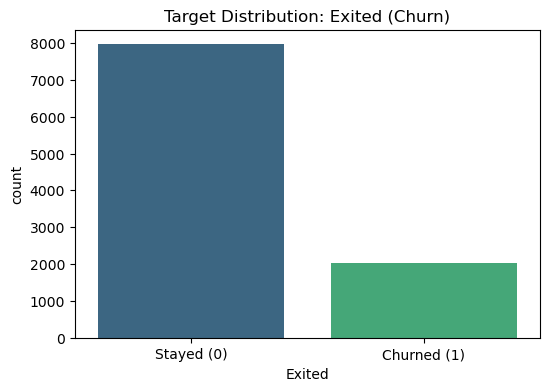

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x='Exited', data=df, palette='viridis')
plt.title('Target Distribution: Exited (Churn)')
plt.xticks([0,1], ['Stayed (0)', 'Churned (1)'])
plt.show()

### 📌 Kredi Skoru (CreditScore) ve Churn İlişkisi  
Düşük kredi skorlarının daha yüksek churn oranlarıyla ilişkili olabileceği düşünülmektedir.  
Bu bölümde kredi skoru dağılımını inceleyerek churn olan ve olmayan müşterileri karşılaştırıyoruz.


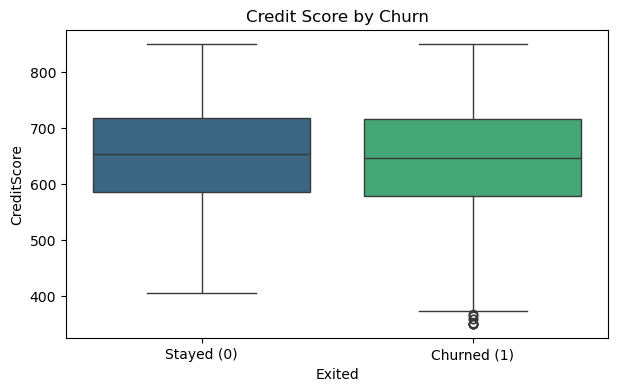

In [9]:
plt.figure(figsize=(7,4))
sns.boxplot(data=df, x='Exited', y='CreditScore', palette='viridis')
plt.title('Credit Score by Churn')
plt.xticks([0,1], ['Stayed (0)', 'Churned (1)'])
plt.show()

### 🌍 Ülke (Geography) ve Churn  
Churn oranları ülkeler arasında belirgin şekilde farklılık gösterebilir.  
Bu veri setinde, genellikle **Almanya'nın (Germany)** en yüksek churn oranına sahip olduğu görülmektedir.


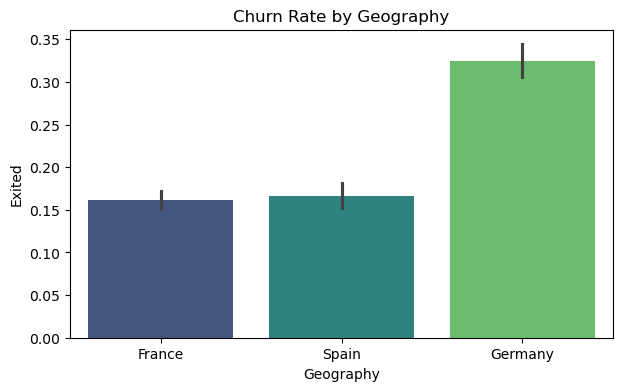

In [10]:
plt.figure(figsize=(7,4))
sns.barplot(data=df, x='Geography', y='Exited', palette='viridis')
plt.title('Churn Rate by Geography')
plt.show()


### 👤 Cinsiyet (Gender) ve Churn  
Cinsiyet farkının churn üzerinde genellikle çok düşük bir etkisi vardır.

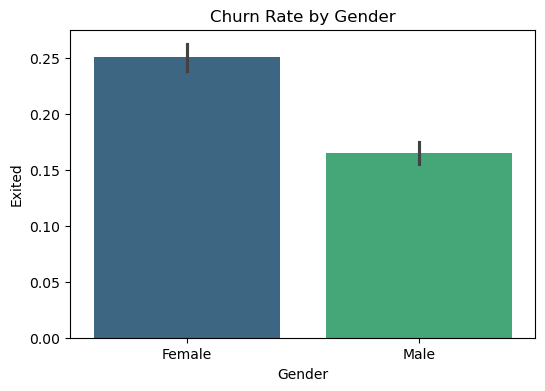

In [11]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='Gender', y='Exited', palette='viridis')
plt.title('Churn Rate by Gender')
plt.show()

### 🎂 Yaş Dağılımı ve Churn Karşılaştırması  
Yaş, churn için en güçlü öngörücülerden biridir.  
Bu bölümde yaş dağılımını inceleyerek churn eden ve etmeyen müşterileri karşılaştırıyoruz.


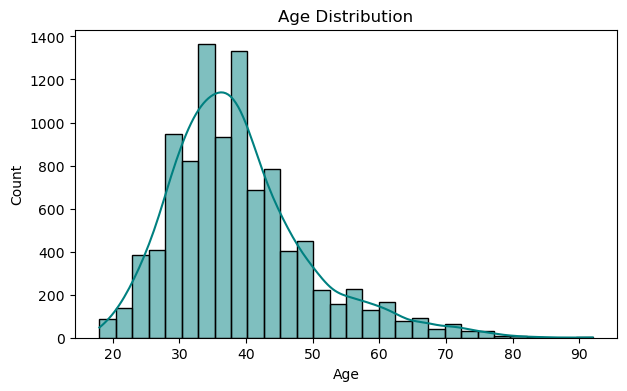

In [12]:
plt.figure(figsize=(7,4))
sns.histplot(data=df, x='Age', kde=True, bins=30, color='teal')
plt.title('Age Distribution')
plt.show()


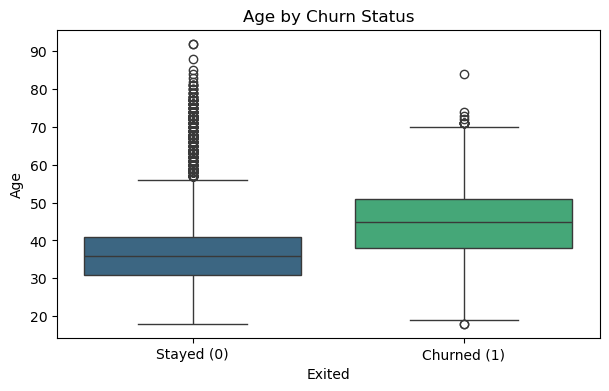

In [13]:
plt.figure(figsize=(7,4))
sns.boxplot(data=df, x='Exited', y='Age', palette='viridis')
plt.title('Age by Churn Status')
plt.xticks([0,1], ['Stayed (0)', 'Churned (1)'])
plt.show()

### 🎂 Yaş Dağılımı Analizi  
Yaş, churn üzerinde belirgin bir etkiye sahiptir.  

- Histogram, müşteri kitlesinin çoğunlukla **30–45 yaş aralığında** toplandığını göstermektedir.  
- Boxplot ise churn eden müşterilerin **daha yüksek yaş grubunda** yoğunlaştığını ortaya koymaktadır.  

Bu bulgular, **yaşın churn için güçlü bir öngörücü değişken** olduğunu açıkça desteklemektedir.


### 💰 Bakiye (Balance) ve Churn  
Bakiye, müşteri kaybını farklı müşteri segmentlerinde farklı şekillerde etkileyebilir.

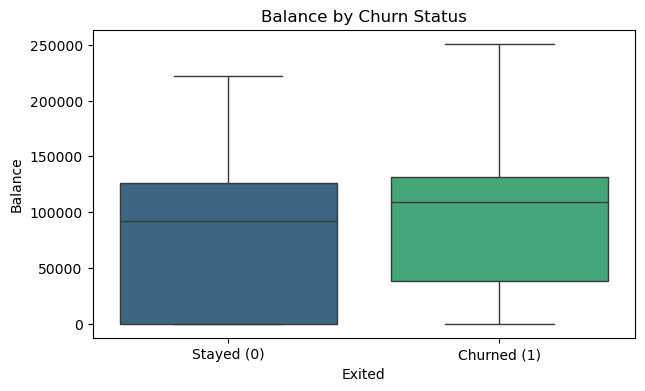

In [14]:
plt.figure(figsize=(7,4))
sns.boxplot(data=df, x='Exited', y='Balance', palette='viridis')
plt.title('Balance by Churn Status')
plt.xticks([0,1], ['Stayed (0)', 'Churned (1)'])
plt.show()


### 📦 Ürün Sayısı (Number of Products) ve Churn  
Yalnızca bir ürüne sahip müşteriler genellikle daha yüksek churn oranına sahiptir.  
İki ürünü olan müşteriler ise çoğunlukla bankaya daha sadık kalmaktadır.

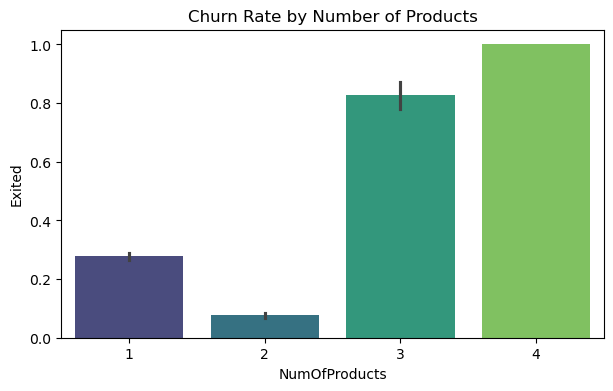

In [15]:
plt.figure(figsize=(7,4))
sns.barplot(data=df, x='NumOfProducts', y='Exited', palette='viridis')
plt.title('Churn Rate by Number of Products')
plt.show()

### 🔌 Aktif vs Pasif Üyeler  
Pasif (inactive) müşteriler, belirgin şekilde daha yüksek churn oranlarına sahiptir.


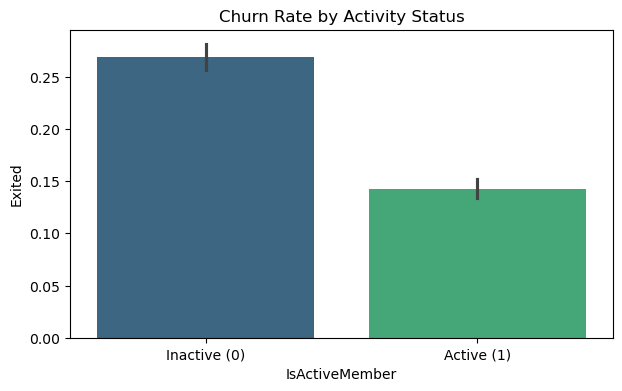

In [16]:
plt.figure(figsize=(7,4))
sns.barplot(data=df, x='IsActiveMember', y='Exited', palette='viridis')
plt.title('Churn Rate by Activity Status')
plt.xticks([0,1], ['Inactive (0)', 'Active (1)'])
plt.show()

### 📊 İstatistiksel Özet (Descriptive Statistics) Analizi  

Veri setinin istatistiksel özetine bakıldığında, değişkenlerin genel dağılımları hakkında önemli bilgiler elde edilmektedir:

- **CreditScore:** Ortalama kredi skoru 650 civarındadır. Minimum 350, maksimum 850 olup geniş bir aralık göstermektedir.  
- **Age:** Ortalama yaş yaklaşık **39**, medyan değer ise **37**'dir. Bu da yaş dağılımının biraz sağa çarpık olduğunu göstermektedir.  
- **Tenure:** Müşterilerin bankada kalma süresi ortalama **5 yıl**, maksimum **10 yıldır**.  
- **Balance:** Bakiyeler çok geniş bir aralık gösteriyor; ortalama **76.000**, maksimum **250.000**'dir. Medyan bakiyenin **97.000** olması, dağılımın yüksek değerlere doğru çarpık olduğunu gösterir.  
- **NumOfProducts:** Müşteriler ortalama **1.5 ürün** kullanmaktadır.  
- **HasCrCard & IsActiveMember:** Bu iki değişken çoğunlukla 0/1 değerleri göstermektedir; ortalamalar sırasıyla **0.7** ve **0.51**'dir.  
- **EstimatedSalary:** Maaşlar oldukça geniş bir aralıkta dağılmış, ortalama **100.000** seviyesindedir.  
- **Exited:** Hedef değişkenin ortalaması **0.203** olup yaklaşık %20 churn oranına karşılık gelmektedir.

Bu istatistikler, veri setindeki dağılımların geniş aralığa sahip olduğunu ve bazı değişkenlerde çarpıklık bulunduğunu göstermektedir. Özellikle **Balance**, **Age** ve **EstimatedSalary** değişkenlerindeki dağılım farklılıkları model performansını etkileyebilir. Ayrıca churn oranının düşük olması, veri dengesizliği probleminin (class imbalance) bulunduğunu doğrulamaktadır.


In [17]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


### 🔥 Korelasyon Heatmap Analizi  
Bu korelasyon matrisi, değişkenler arasındaki doğrusal ilişkilerin gücünü ve yönünü göstermektedir.  
Genel olarak değişkenler arasında yüksek korelasyon bulunmamaktadır; bu, çoklu doğrusal bağlantı (multicollinearity) riskinin düşük olduğu anlamına gelir.

**Öne çıkan bulgular:**

- **Yaş (Age) ve Churn (Exited)** arasında pozitif ve en güçlü korelasyonlardan biri vardır (≈ 0.29).  
  → Yaş arttıkça churn olasılığı yükselir.  
- **Aktif Üyelik (IsActiveMember)** churn ile negatif korelasyona sahiptir (≈ -0.16).  
  → Aktif müşteriler daha az churn eder.  
- **Ürün Sayısı (NumOfProducts)** ile churn arasında zayıf bir negatif ilişki görülmektedir (≈ -0.048).  
- **Balance, CreditScore, Salary** gibi değişkenlerin churn ile korelasyonları oldukça zayıftır.

Bu sonuçlar, churn’ü açıklamada en etkili özelliklerin **Age** ve **IsActiveMember** olduğunu göstermektedir.


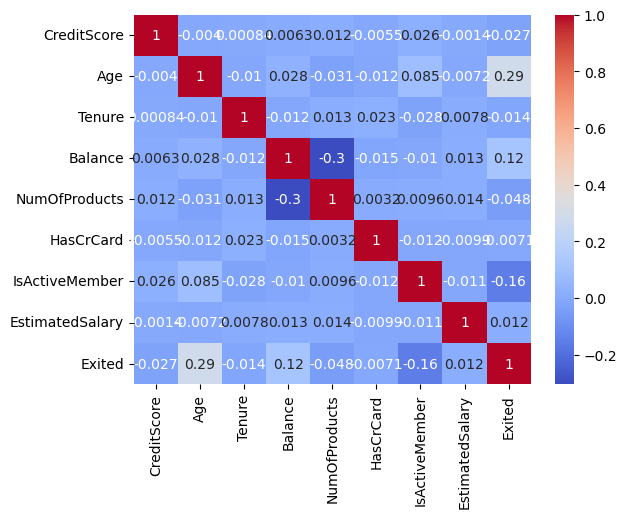

In [18]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()

### 🔍 Pairplot İncelemesi  
Pairplot grafiği, tüm sayısal değişken çiftleri arasındaki ilişkileri incelemeyi amaçlamaktadır.  
Ancak bu veri setinde sütun sayısının fazla olması nedeniyle grafik oldukça karmaşık bir görünüm sunmaktadır.

Bu nedenle pairplot, bu projede anlamlı bir içgörü sağlamamakta ve yorumlanabilirlik açısından sınırlı kalmaktadır.  
Daha net yorumlar için heatmap ve tekil değişken dağılımlarına bakmak daha uygun bir yaklaşımdır.


<Figure size 1200x600 with 0 Axes>

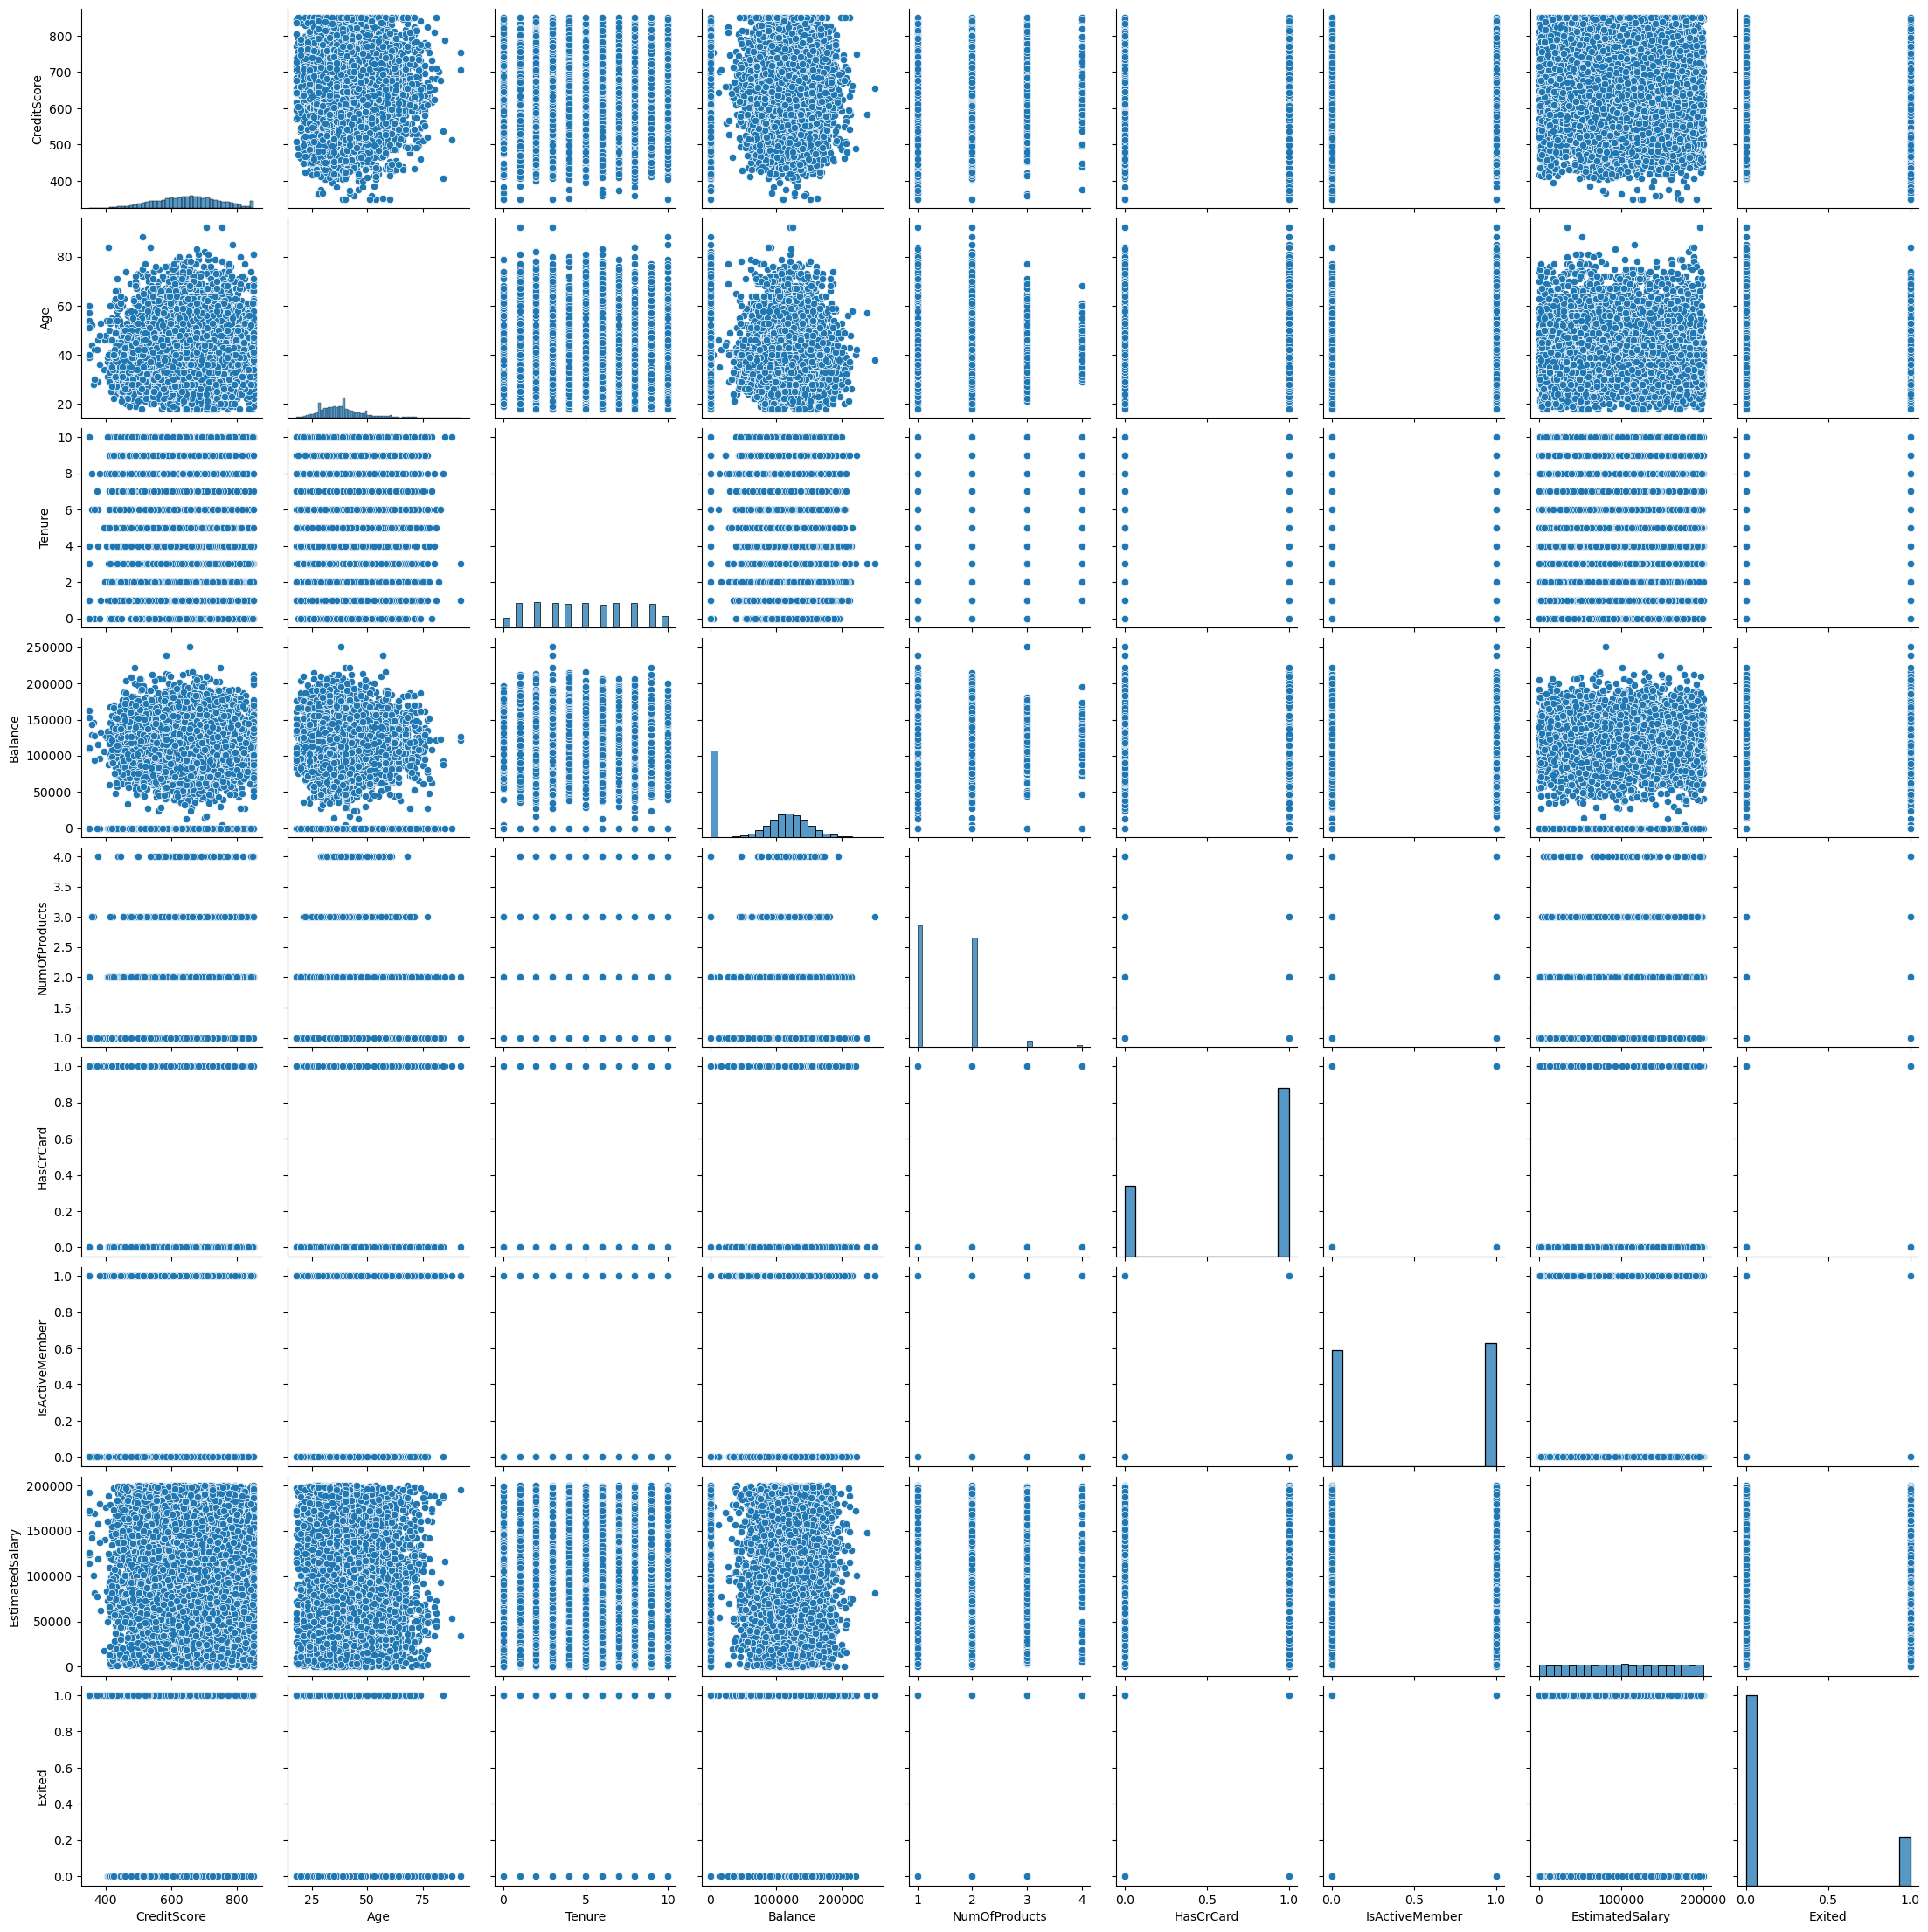

In [19]:
plt.figure(figsize=(12, 6))
sns.pairplot(df, palette="Dark2")

### 🔧 Kategorik Değişkenlerin Kodlanması (Encoding)

Makine öğrenimi algoritmaları yalnızca sayısal verilerle çalıştığından, kategorik değişkenlerin uygun bir şekilde sayısal forma dönüştürülmesi gerekir.

- **Gender (Cinsiyet)** → İkili kategori (Male / Female) → Label Encoding uygulanır.  
- **Geography (Ülke)** → Çok kategorili (France, Spain, Germany) → One-Hot Encoding kullanılır.

Bu işlem, modelin kategorik değerleri sıralı (ordinal) bir anlam taşıyormuş gibi yorumlamasını engeller ve daha doğru bir öğrenme süreci sağlar.


In [20]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for Gender
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# One-Hot Encoding for Geography
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


### 🎯 Özelliklerin (X) ve Hedef Değişkenin (y) Ayrılması  
Modelin churn'e yol açan örüntüleri öğrenebilmesi için,  
bağımsız değişkenler (X) ile hedef değişken (y) birbirinden ayrılır.  
Bu adım, modelin yalnızca açıklayıcı değişkenler üzerinden öğrenmesini sağlar.


In [21]:
X = df.drop('Exited', axis=1)
y = df['Exited']

### ✂️ Train-Test Ayrımı  
Veri seti, modelin hiç görmediği veriler üzerinde değerlendirilmesini sağlamak için  
%80 eğitim ve %20 test olacak şekilde ikiye ayrılmıştır.

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


### 📏 Özellik Ölçeklendirme (Feature Scaling)  
Logistic Regression, SVM ve KNN gibi bazı modeller,  
uzaklık temelli hesaplamalar veya gradyan optimizasyonu kullandıkları için  
ölçeklendirilmiş verilere ihtiyaç duyar.

Bu nedenle tüm sayısal değişkenlerin benzer bir ölçekte olması için  
(mean=0, std=1) StandardScaler uygulanmıştır.


In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 🧮 Model Değerlendirme Fonksiyonu (evaluate_model)

Bu fonksiyon, verilen sınıflandırma modelini eğitir ve test verisi üzerinde  
beş farklı performans metriğini otomatik olarak hesaplar:

- **Accuracy** → Genel doğruluk oranı  
- **Precision** → Pozitif tahminlerin doğruluk oranı  
- **Recall** → Gerçek pozitiflerin ne kadarının tahmin edildiği  
- **F1 Score** → Precision ve Recall’un dengeli ortalaması  
- **ROC-AUC** → Modelin sınıfları ayırt etme yeteneği

Fonksiyon ayrıca, `predict_proba` desteği olmayan modelleri (ör. SVM) de kontrol ederek  
uygun şekilde ROC-AUC değerini hesaplar.  

Bu yapı sayesinde tüm modeller tek bir fonksiyonla değerlendirilebilir  
ve sonuçlar tutarlı bir formatta elde edilir.


In [24]:
def evaluate_model(model, X_train, y_train, X_test, y_test):

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_prob)
    else:
        auc = None

    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "ROC_AUC": auc
    }


<div style="background-color:#0D1B2A; padding:18px; border-radius:10px; color:white; margin-top:20px;">
    <h2>🤖 Makine Öğrenimi Modelleri</h2>
    <p>
        Müşteri ayrılmasını (churn) tahmin etmek için birden fazla makine öğrenimi modeli 
        eğitilecek ve değerlendirilecektir. 
        En etkili algoritmayı belirleyebilmek amacıyla 
        Accuracy, Precision, Recall, F1-Skor ve ROC-AUC gibi performans metrikleri 
        karşılaştırmada kullanılacaktır.
    </p>
</div>

<div style="background-color:#2ECC71; padding:18px; border-radius:10px; color:white; margin-top:20px;">
    <h2>📉 Model 1: Logistic Regression</h2>
    <p>
        Logistic Regression, proje için temel (baseline) model olarak kullanılır. 
        Basit, açıklanabilir bir yapıya sahiptir ve 
        Random Forest, XGBoost ve CatBoost gibi daha karmaşık modellerin performansını 
        karşılaştırmak için bir referans noktası oluşturur.
    </p>
</div>

In [25]:
log_results = evaluate_model(LogisticRegression(max_iter=1000), 
                             X_train_scaled, y_train, 
                             X_test_scaled, y_test)

log_results

{'Accuracy': 0.808,
 'Precision': 0.5891472868217055,
 'Recall': 0.18673218673218672,
 'F1': 0.2835820895522388,
 'ROC_AUC': np.float64(0.7747778595236223)}

<div style="background-color:#1F6FEB; padding:18px; border-radius:10px; color:white; margin-top:20px;">
    <h2>🌲 Model 2: Random Forest Classifier</h2>
    <p>
        Random Forest, birden fazla karar ağacının oluşturulup 
        tahminlerinin birleştirilmesiyle çalışan bir topluluk (ensemble) algoritmasıdır. 
        Doğrusal olmayan ilişkileri iyi yakalar ve müşteri ayrılma (churn) tahmini gibi 
        tablo şeklindeki veri setlerinde güçlü bir performans sergiler.
    </p>
</div>

In [26]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    class_weight='balanced'
)

rf_results = evaluate_model(
    rf_model,
    X_train_scaled, y_train,
    X_test_scaled, y_test
)

rf_results


{'Accuracy': 0.8605,
 'Precision': 0.7735042735042735,
 'Recall': 0.44471744471744473,
 'F1': 0.5647425897035881,
 'ROC_AUC': np.float64(0.8533402431707516)}

<div style="background-color:#0D3B66; padding:18px; border-radius:10px; color:white; margin-top:20px;">
    <h2>⚡ Model 3: Gradient Boosting Classifier</h2>
    <p>
        Gradient Boosting, her bir ağacın bir önceki modelin hatalarını düzeltecek şekilde 
        ardışık olarak oluşturulduğu güçlü bir topluluk (ensemble) yöntemidir. 
        Özellikle churn tahmini gibi tablo yapısındaki veri setlerinde, 
        Random Forest’a göre daha iyi performans gösterebildiği durumlar oldukça yaygındır.
    </p>
</div>


In [27]:
gb_model = GradientBoostingClassifier(
    learning_rate=0.05,
    n_estimators=300,
    max_depth=3,
    random_state=42
)

gb_results = evaluate_model(
    gb_model,
    X_train_scaled, y_train,
    X_test_scaled, y_test
)

gb_results

{'Accuracy': 0.869,
 'Precision': 0.7777777777777778,
 'Recall': 0.4987714987714988,
 'F1': 0.6077844311377245,
 'ROC_AUC': np.float64(0.8715633969871257)}

<div style="background-color:#8B0000; padding:18px; border-radius:10px; color:white; margin-top:20px;">
    <h2>🔥 Model 4: XGBoost Classifier</h2>
    <p>
        XGBoost (Extreme Gradient Boosting), yapılandırılmış (tabular) veriler üzerinde 
        en yüksek performans gösteren algoritmalardan biridir. 
        Optimize edilmiş gradient boosting teknikleri, düzenlileştirme (regularization) 
        ve verimli ağaç oluşturma yöntemleri sayesinde, sınıflandırma problemlerinde 
        sıklıkla üstün sonuçlar elde eder.
    </p>
</div>


In [28]:
xgb_model = xgb.XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'
)

xgb_results = evaluate_model(
    xgb_model,
    X_train_scaled, y_train,
    X_test_scaled, y_test
)

xgb_results


{'Accuracy': 0.8715,
 'Precision': 0.8048780487804879,
 'Recall': 0.4864864864864865,
 'F1': 0.6064318529862175,
 'ROC_AUC': np.float64(0.8654154925341366)}

<div style="background-color:#0A4B3B; padding:18px; border-radius:10px; color:white; margin-top:20px;">
    <h2>🚀 Model 5: LightGBM Classifier</h2>
    <p>
        LightGBM, ağaç tabanlı öğrenme kullanan son derece verimli bir 
        gradient boosting framework'üdür. 
        Hız ve performans için optimize edilmiştir ve yapılandırılmış (tabular) 
        veri setlerinde çoğu zaman XGBoost’tan daha iyi sonuç verebilmektedir.
    </p>
</div>


In [29]:
lgb_model = lgb.LGBMClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

lgb_results = evaluate_model(
    lgb_model,
    X_train_scaled, y_train,
    X_test_scaled, y_test
)

lgb_results


[LightGBM] [Info] Number of positive: 1630, number of negative: 6370
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000457 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 864
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203750 -> initscore=-1.363019
[LightGBM] [Info] Start training from score -1.363019


{'Accuracy': 0.8585,
 'Precision': 0.7421875,
 'Recall': 0.4668304668304668,
 'F1': 0.5731523378582202,
 'ROC_AUC': np.float64(0.8576635186804679)}

<div style="background-color:#4B0082; padding:18px; border-radius:10px; color:white; margin-top:20px;">
    <h2>🐈 Model 6: CatBoost Classifier</h2>
    <p>
        CatBoost, kategorik değişkenler için optimize edilmiş bir gradient boosting 
        algoritmasıdır ve ek ön işleme gerek duymadan yüksek performans gösterebilir. 
        Özellikle dengesiz (imbalanced) veri setlerinde güçlü recall ve istikrarlı 
        sonuçlar üretmesiyle bilinir.
    </p>
</div>

In [30]:
cat_model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.05,
    depth=6,
    loss_function='Logloss',
    verbose=0,
    random_state=42
)

cat_model.fit(X_train_scaled, y_train, verbose=0)
y_pred_cat = cat_model.predict(X_test_scaled)

y_prob_cat = cat_model.predict_proba(X_test_scaled)[:, 1]


cat_results = evaluate_model(
    cat_model,
    X_train_scaled, y_train,
    X_test_scaled, y_test
)

cat_results



{'Accuracy': 0.874,
 'Precision': 0.8137651821862348,
 'Recall': 0.49385749385749383,
 'F1': 0.6146788990825688,
 'ROC_AUC': np.float64(0.8687346822940044)}

<div style="background-color:#003049; padding:18px; border-radius:10px; color:white; margin-top:20px;">
    <h2>🧮 Model 7: Support Vector Machine (SVM)</h2>
    <p>
        SVM, yüksek boyutlu verilerde güçlü performans gösterebilen etkili bir 
        sınıflandırma algoritmasıdır. Özellik ölçeklendirmesi yapıldıktan sonra 
        keskin ve rekabetçi karar sınırları üretebilir. 
        Ancak, dengesiz veri setlerinde ve çok büyük eğitim boyutlarında 
        zaman zaman zorlanabilir.
    </p>
</div>


In [31]:
svm_model = SVC(
    kernel='rbf',
    probability=True,
    C=1.0,
    gamma='scale',
    random_state=42
)

svm_results = evaluate_model(
    svm_model,
    X_train_scaled, y_train,
    X_test_scaled, y_test
)

svm_results


{'Accuracy': 0.861,
 'Precision': 0.8341968911917098,
 'Recall': 0.3955773955773956,
 'F1': 0.5366666666666666,
 'ROC_AUC': np.float64(0.8269440472830303)}

<div style="background-color:#2D6A4F; padding:18px; border-radius:10px; color:white; margin-top:20px;">
    <h2>👥 Model 8: K-Nearest Neighbors (KNN)</h2>
    <p>
        KNN, bir veri noktasının sınıfını en yakın komşularına bakarak belirleyen 
        mesafe temelli bir algoritmadır. Özellik ölçeklendirmesi sonrasında makul 
        performans gösterebilir ancak yüksek boyutlu veya dengesiz veri setlerinde 
        zorlanması mümkündür.
    </p>
</div>


In [32]:
knn_model = KNeighborsClassifier(
    n_neighbors=5,
    weights='distance',
    metric='minkowski'
)

knn_results = evaluate_model(
    knn_model,
    X_train_scaled, y_train,
    X_test_scaled, y_test
)

knn_results


{'Accuracy': 0.826,
 'Precision': 0.6266094420600858,
 'Recall': 0.35872235872235875,
 'F1': 0.45625,
 'ROC_AUC': np.float64(0.7599803193023532)}

<div style="background-color:#5A189A; padding:18px; border-radius:10px; color:white; margin-top:20px;">
    <h2>🌳 Model 9: Decision Tree Classifier</h2>
    <p>
        Karar Ağaçları, veriyi özellik eşiklerine göre bölerek çalışan basit 
        fakat etkili modellerdir. Yorumlanabilirlik açısından avantaj sağlarlar, 
        ancak doğru şekilde düzenlileştirilmezlerse (regularization) kolayca aşırı 
        öğrenme (overfitting) yapabilirler.
    </p>
</div>


In [33]:
dt_model = DecisionTreeClassifier(
    max_depth=6,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)

dt_results = evaluate_model(
    dt_model,
    X_train_scaled, y_train,
    X_test_scaled, y_test
)

dt_results


{'Accuracy': 0.8595,
 'Precision': 0.7739130434782608,
 'Recall': 0.43734643734643736,
 'F1': 0.5588697017268446,
 'ROC_AUC': np.float64(0.8419845114760369)}

<div style="background-color:#14213D; padding:18px; border-radius:10px; color:white; margin-top:25px;">
    <h2>📊 Model Performans Karşılaştırması</h2>
    <p>
        Aşağıda bu projede eğitilen tüm makine öğrenimi modellerinin 
        Accuracy, Precision, Recall, F1-Skor ve ROC-AUC metriklerine göre 
        performans karşılaştırması yer almaktadır. 
        Bu tablo, müşteri ayrılma (churn) tahmini için en başarılı modellerin 
        belirlenmesine yardımcı olur.
    </p>
</div>


In [34]:
results = {
    "Logistic Regression": log_results,
    "Random Forest": rf_results,
    "Gradient Boosting": gb_results,
    "XGBoost": xgb_results,
    "LightGBM": lgb_results,
    "CatBoost": cat_results,
    "SVM": svm_results,
    "KNN": knn_results,
    "Decision Tree": dt_results
}

In [35]:
compare = pd.DataFrame(results).T
compare

,Accuracy,Precision,Recall,F1,ROC_AUC
Logistic Regression,0.8080,0.589147,0.186732,0.283582,0.774778
Random Forest,0.8605,0.773504,0.444717,0.564743,0.853340
Gradient Boosting,0.8690,0.777778,0.498771,0.607784,0.871563
XGBoost,0.8715,0.804878,0.486486,0.606432,0.865415
LightGBM,0.8585,0.742188,0.466830,0.573152,0.857664
CatBoost,0.8740,0.813765,0.493857,0.614679,0.868735
SVM,0.8610,0.834197,0.395577,0.536667,0.826944
KNN,0.8260,0.626609,0.358722,0.456250,0.759980
Decision Tree,0.8595,0.773913,0.437346,0.558870,0.841985


In [36]:
def add_labels(ax):
    for p in ax.patches:
        value = p.get_width()
        ax.text(value, p.get_y() + p.get_height()/2,
                f"{value:.3f}", va="center")


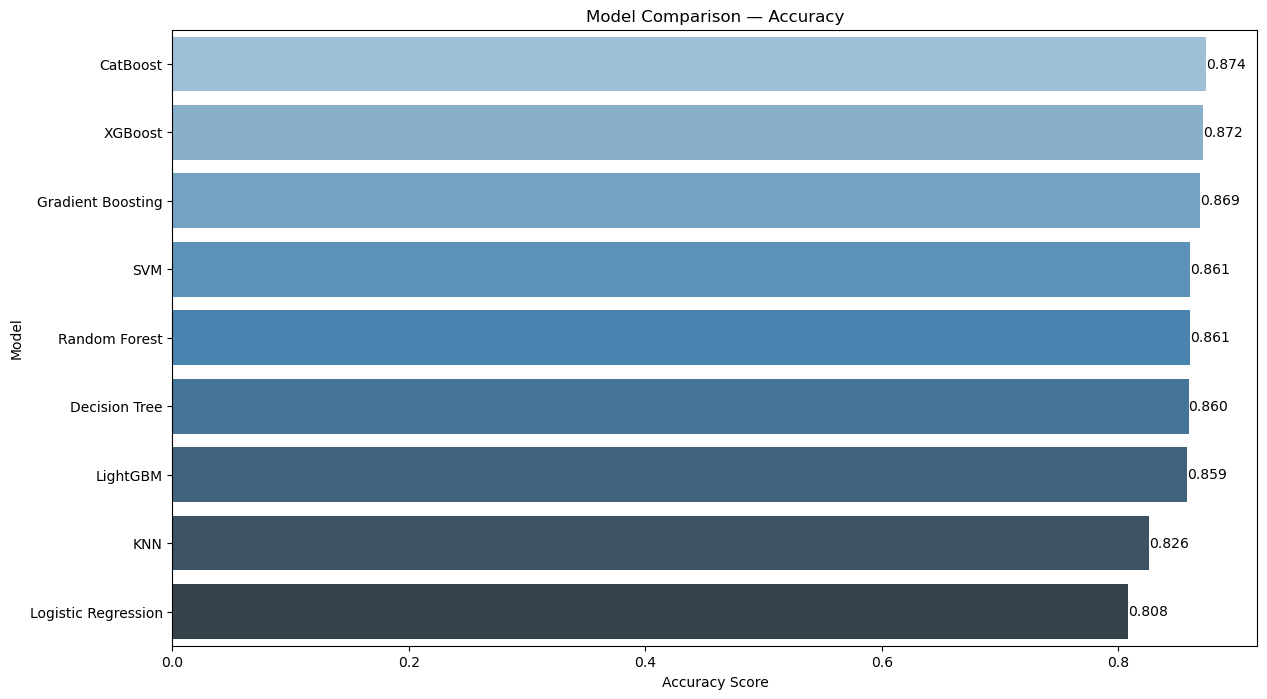

In [37]:
plt.figure(figsize=(14, 8))
df_plot = compare.sort_values(by="Accuracy", ascending=False)

ax = sns.barplot(x=df_plot["Accuracy"], y=df_plot.index, palette="Blues_d")
add_labels(ax)

plt.title("Model Comparison — Accuracy")
plt.xlabel("Accuracy Score")
plt.ylabel("Model")
plt.show()


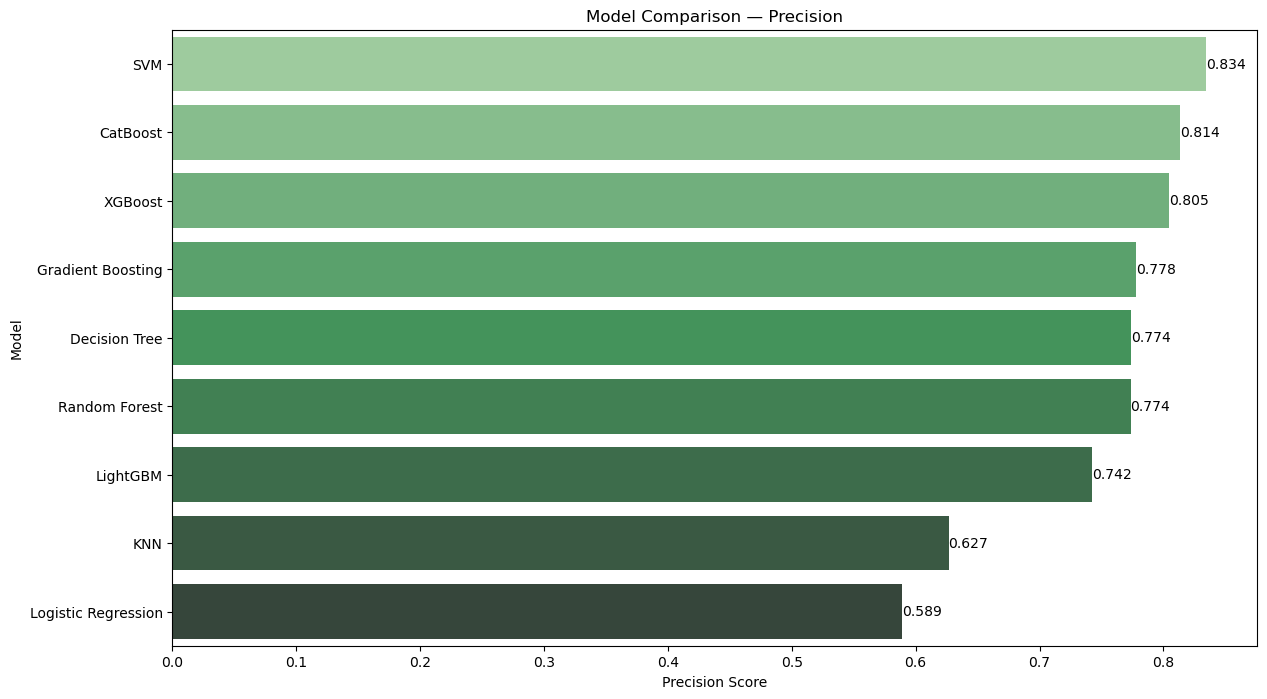

In [38]:
plt.figure(figsize=(14, 8))
df_plot = compare.sort_values(by="Precision", ascending=False)

ax = sns.barplot(x=df_plot["Precision"], y=df_plot.index, palette="Greens_d")
add_labels(ax)

plt.title("Model Comparison — Precision")
plt.xlabel("Precision Score")
plt.ylabel("Model")
plt.show()


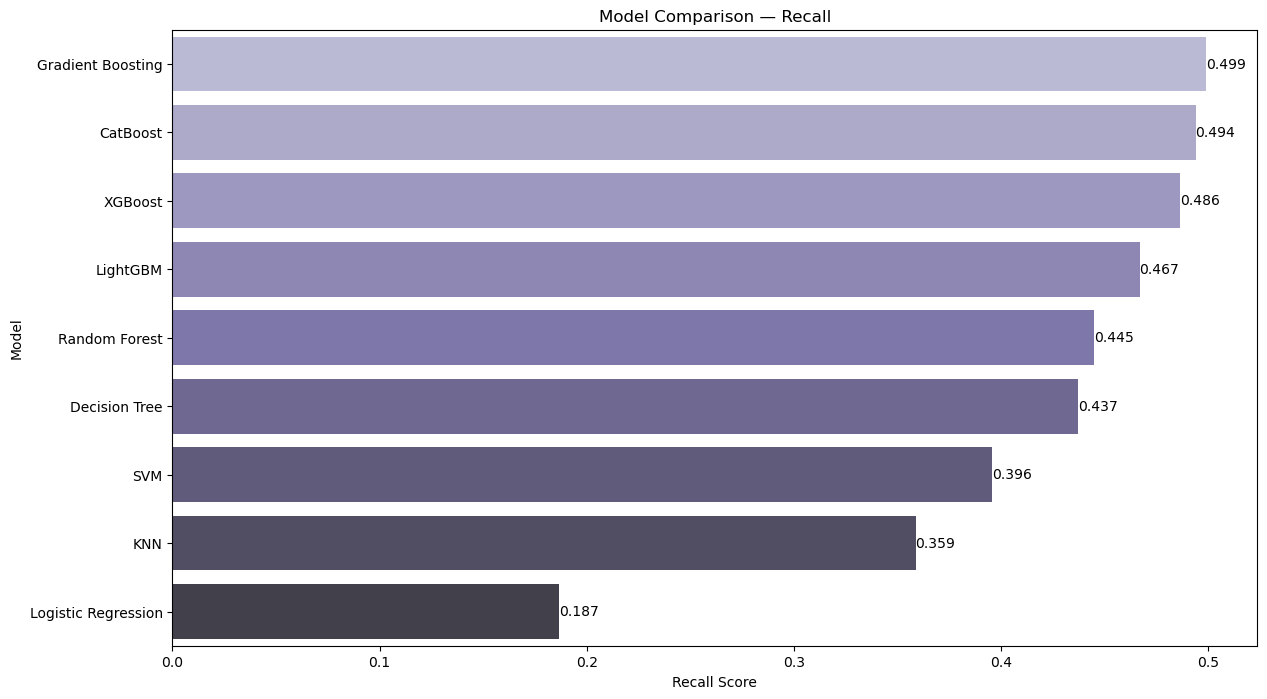

In [39]:
plt.figure(figsize=(14, 8))
df_plot = compare.sort_values(by="Recall", ascending=False)

ax = sns.barplot(x=df_plot["Recall"], y=df_plot.index, palette="Purples_d")
add_labels(ax)

plt.title("Model Comparison — Recall")
plt.xlabel("Recall Score")
plt.ylabel("Model")
plt.show()

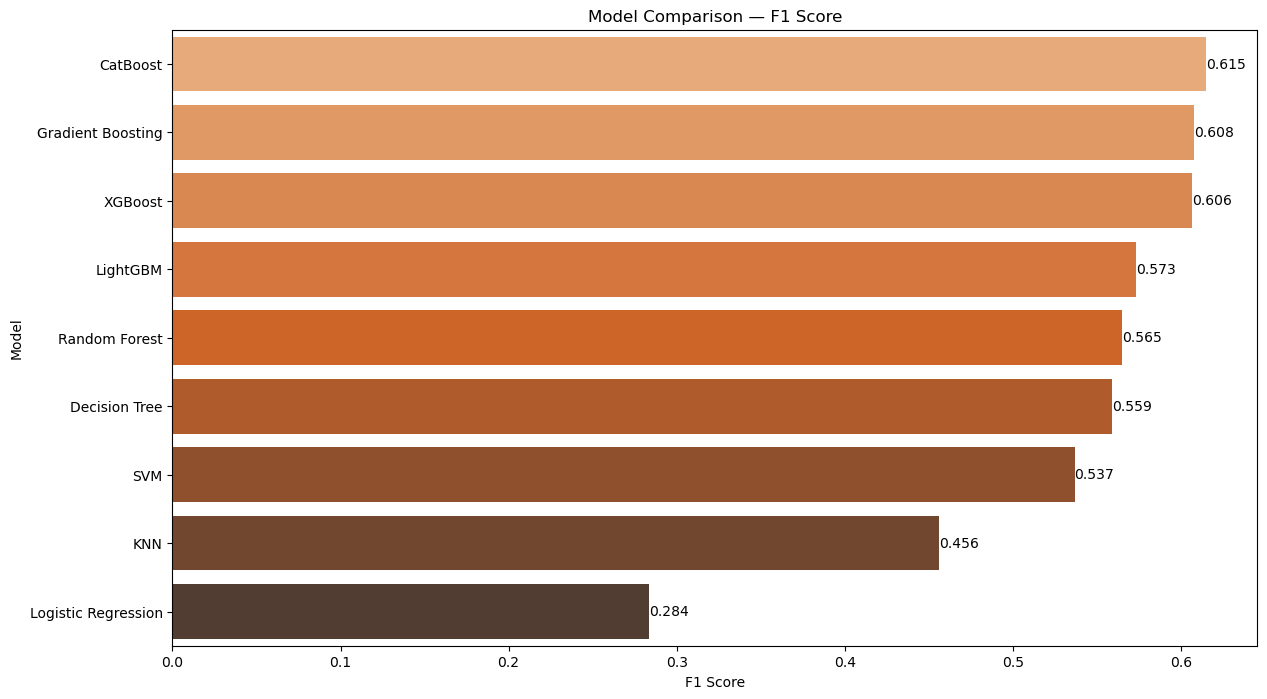

In [40]:
plt.figure(figsize=(14, 8))
df_plot = compare.sort_values(by="F1", ascending=False)

ax = sns.barplot(x=df_plot["F1"], y=df_plot.index, palette="Oranges_d")
add_labels(ax)

plt.title("Model Comparison — F1 Score")
plt.xlabel("F1 Score")
plt.ylabel("Model")
plt.show()


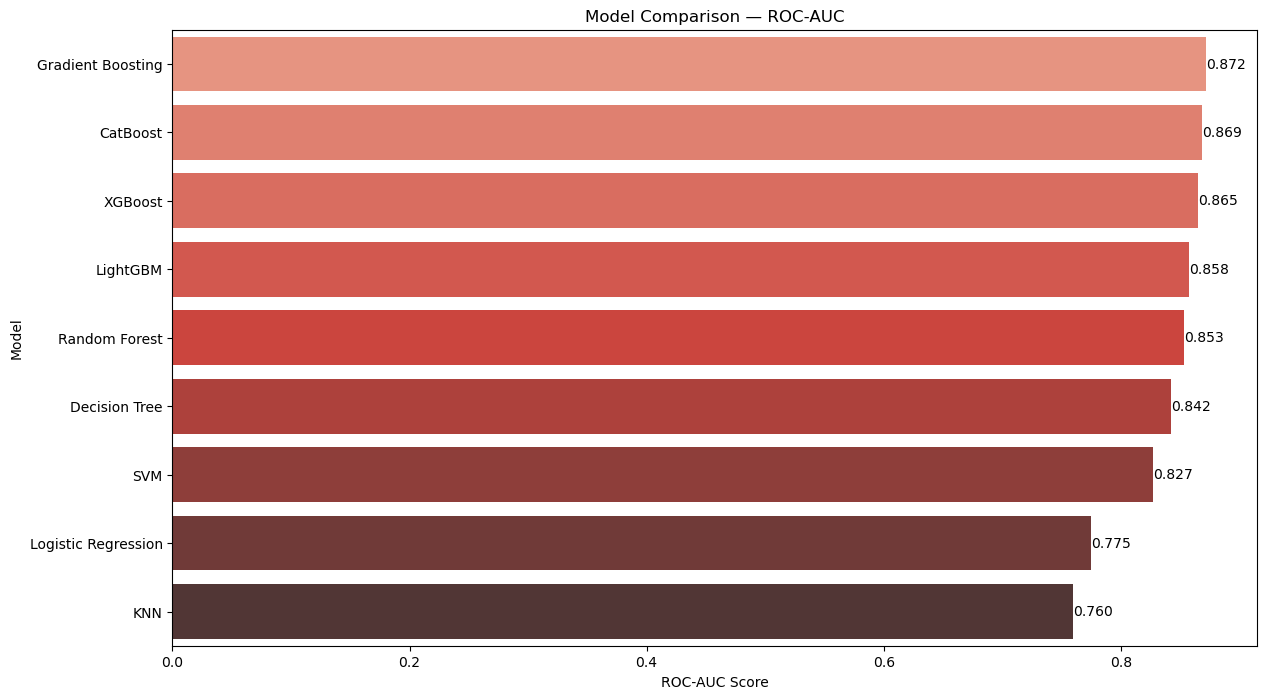

In [41]:
plt.figure(figsize=(14, 8))
df_plot = compare.sort_values(by="ROC_AUC", ascending=False)

ax = sns.barplot(x=df_plot["ROC_AUC"], y=df_plot.index, palette="Reds_d")
add_labels(ax)

plt.title("Model Comparison — ROC-AUC")
plt.xlabel("ROC-AUC Score")
plt.ylabel("Model")
plt.show()


<div style="background-color:#3A0CA3; padding:22px; border-radius:14px; color:white; margin-top:30px;">
  <h2 style="margin-bottom:15px;">🏆 Final Model Seçimi: <span style="color:#F72585;">CatBoost</span></h2>

Tüm modeller Accuracy, Precision, Recall, F1-Skor ve ROC-AUC metriklerine göre değerlendirildi.
Bu değerlendirmeler sonucunda CatBoost, tüm metriklerde dengeli ve tutarlı performans göstererek
projenin en başarılı modeli olarak öne çıktı.

CatBoost’un öne çıkma nedenleri:

En yüksek F1 Skoru

Yüksek Precision

Yüksek Recall

Güçlü ROC-AUC skoru

Dengesiz veri setlerinde stabil performans

Kategorik değişkenleri doğal olarak işleme yeteneği

Bu nedenle CatBoost, Bank Customer Churn Prediction projesinin final modeli olarak seçilmiştir.

<div style="background-color:#0B4F6C; padding:18px; border-radius:10px; color:white; margin-top:25px;">
  <h2>🎯 Hyperparameter Tuning (CatBoost) – RandomizedSearchCV</h2>
  <p>
    Bu adımda CatBoost modelinin performansını artırmak için <strong>RandomizedSearchCV</strong> ile
    farklı hiperparametre kombinasyonları denenir. Her kombinasyon <strong>3-fold Cross Validation</strong> ile
    değerlendirilir ve seçim kriteri olarak <strong>F1-score</strong> kullanılır.
  </p>
  <ul>
    <li><strong>Amaç:</strong> En iyi parametreleri bulup <code>final_model</code> olarak belirlemek</li>
    <li><strong>Arama uzayı:</strong> <code>depth</code>, <code>learning_rate</code>, <code>iterations</code></li>
    <li><strong>Değerlendirme:</strong> <code>cv=3</code>, <code>scoring="f1"</code></li>
    <li><strong>Çıktılar:</strong> <code>rs.best_params_</code>, <code>rs.best_score_</code>, en iyi 10 deneme tablosu</li>
  </ul>
  <p style="margin-bottom:0;">
    ✅ Bu adımın sonunda <code>final_model = rs.best_estimator_</code> ile en iyi CatBoost modeli seçilir ve
    sonraki aşamalarda (metrikler, confusion matrix, feature importance, SHAP, kayıt) bu model kullanılır.
  </p>
</div>


In [42]:

params = {
    "depth": [4, 5, 6, 8, 10],
    "learning_rate": [0.01, 0.03, 0.05, 0.1],
    "iterations": [200, 300, 400, 600]
}

rs = RandomizedSearchCV(
    estimator=CatBoostClassifier(loss_function="Logloss", verbose=0, random_state=42),
    param_distributions=params,
    n_iter=10,
    cv=3,
    scoring="f1",
    random_state=42,
    n_jobs=-1
)

rs.fit(X_train, y_train)

final_model = rs.best_estimator_
print("✅ Best Params:", rs.best_params_)
print("✅ Best CV F1:", rs.best_score_)

results_df = pd.DataFrame(rs.cv_results_).sort_values(by="mean_test_score", ascending=False)
display(results_df[["params","mean_test_score","std_test_score","rank_test_score"]].head(10))

✅ Best Params: {'learning_rate': 0.05, 'iterations': 600, 'depth': 5}
✅ Best CV F1: 0.592692908052907


,params,mean_test_score,std_test_score,rank_test_score
0,"{'learning_rate': 0.05, 'iterations': 600, 'de...",0.592693,0.012207,1
6,"{'learning_rate': 0.05, 'iterations': 400, 'de...",0.591318,0.014423,2
3,"{'learning_rate': 0.1, 'iterations': 600, 'dep...",0.588012,0.018659,3
2,"{'learning_rate': 0.05, 'iterations': 300, 'de...",0.587223,0.015755,4
4,"{'learning_rate': 0.05, 'iterations': 200, 'de...",0.584666,0.012955,5
5,"{'learning_rate': 0.01, 'iterations': 600, 'de...",0.580470,0.006132,6
9,"{'learning_rate': 0.01, 'iterations': 600, 'de...",0.572988,0.007688,7
7,"{'learning_rate': 0.05, 'iterations': 300, 'de...",0.569125,0.016914,8
8,"{'learning_rate': 0.01, 'iterations': 300, 'de...",0.543619,0.009174,9
1,"{'learning_rate': 0.01, 'iterations': 200, 'de...",0.526114,0.010210,10


<div style="background-color:#2D6A4F; padding:18px; border-radius:10px; color:white; margin-top:25px;">
  <h2>🏁 Final Test Tahminleri ve Performans Metrikleri</h2>
  <p>
    Bu adımda <code>final_model</code> ile test verisi üzerinde tahminler üretilir:
    <strong>y_pred_final</strong> (0/1 sınıf tahmini) ve <strong>y_prob_final</strong> (Exited=1 olasılığı).
    Özellikle <strong>ROC-AUC</strong> metriği için olasılık değerleri gereklidir.
  </p>
  <ul>
    <li><code>y_pred_final</code>: Sınıf tahmini (Stayed=0 / Exited=1)</li>
    <li><code>y_prob_final</code>: Exited=1 olasılığı (0–1 arası)</li>
    <li><strong>Raporlanan metrikler:</strong> Accuracy, Precision, Recall, F1, ROC-AUC</li>
  </ul>
  <p style="margin-bottom:0;">
    ✅ Bu metrikler, final modelin genel başarısını özetler ve sonraki adımlarda
    Confusion Matrix / Classification Report ile daha detaylı analiz edilir.
  </p>
</div>


In [ ]:

y_pred_final = final_model.predict(X_test)
y_prob_final = final_model.predict_proba(X_test)[:, 1]   # AUC 

print("\n🏁 FINAL TEST METRICS (CatBoost Tuned)")
print("Accuracy :", accuracy_score(y_test, y_pred_final))
print("Precision:", precision_score(y_test, y_pred_final))
print("Recall   :", recall_score(y_test, y_pred_final))
print("F1       :", f1_score(y_test, y_pred_final))
print("ROC-AUC  :", roc_auc_score(y_test, y_prob_final))


🏁 FINAL TEST METRICS (CatBoost Tuned)
Accuracy : 0.8715
Precision: 0.7906976744186046
Recall   : 0.5012285012285013
F1       : 0.6135338345864662
ROC-AUC  : 0.8633687616738465


<div style="background-color:#1B263B; padding:18px; border-radius:10px; color:white; margin-top:25px;">
    <h2>📉 Karışıklık Matrisi (Confusion Matrix) – CatBoost</h2>
    <p>
        Bu karışıklık matrisi, CatBoost modelinin churn eden ve etmeyen müşterileri 
        ne kadar başarılı şekilde ayırt ettiğini gösterir.  
        Doğru Pozitifler (gerçek churn eden müşterilerin doğru tahmini) ve 
        Yanlış Negatifler (kaçırılan churn vakaları) özellikle iş kararları ve 
        müşteri elde tutma stratejileri açısından kritik önem taşır.
    </p>
</div>


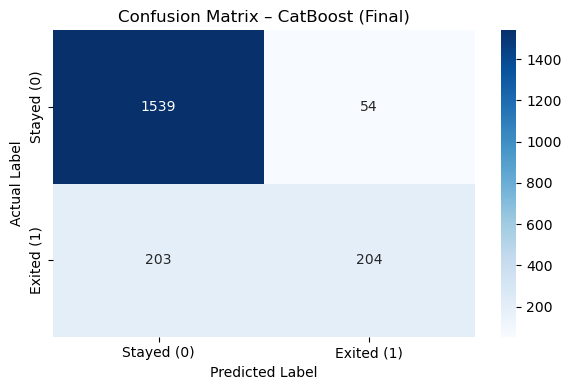

In [44]:

cm = confusion_matrix(y_test, y_pred_final)
labels = ["Stayed (0)", "Exited (1)"]

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix – CatBoost (Final)")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.tight_layout()
plt.show()


<div style="background-color:#415A77; padding:18px; border-radius:10px; color:white; margin-top:25px;">
    <h2>📄 Sınıflandırma Raporu (Classification Report) – CatBoost</h2>
    <p>
        Bu sınıflandırma raporu, her sınıf için Precision, Recall, F1-Skor ve Support 
        değerlerini özetlemektedir.  
        Churn tahmininde en kritik metrik, <strong>“1” (Exited)</strong> sınıfına ait 
        Recall değeridir çünkü modelin churn eden müşterileri ne kadar doğru yakaladığını gösterir.
    </p>
</div>


In [45]:

print("\n📄 Classification Report – CatBoost (Final)")
print(classification_report(y_test, y_pred_final))


📄 Classification Report – CatBoost (Final)
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1593
           1       0.79      0.50      0.61       407

    accuracy                           0.87      2000
   macro avg       0.84      0.73      0.77      2000
weighted avg       0.86      0.87      0.86      2000



<div style="background-color:#0B525B; padding:18px; border-radius:10px; color:white; margin-top:25px;">
    <h2>📊 Özellik Önemi (Feature Importance) – CatBoost</h2>
    <p>
        Özellik önemi, CatBoost modelinde müşteri churn tahminini en çok etkileyen 
        değişkenleri gösterir. Bu sayede modelin nasıl karar verdiği daha iyi 
        anlaşılır ve iş birimlerinin stratejik kararlarını veriyle desteklemesine 
        yardımcı olur.
    </p>
</div>


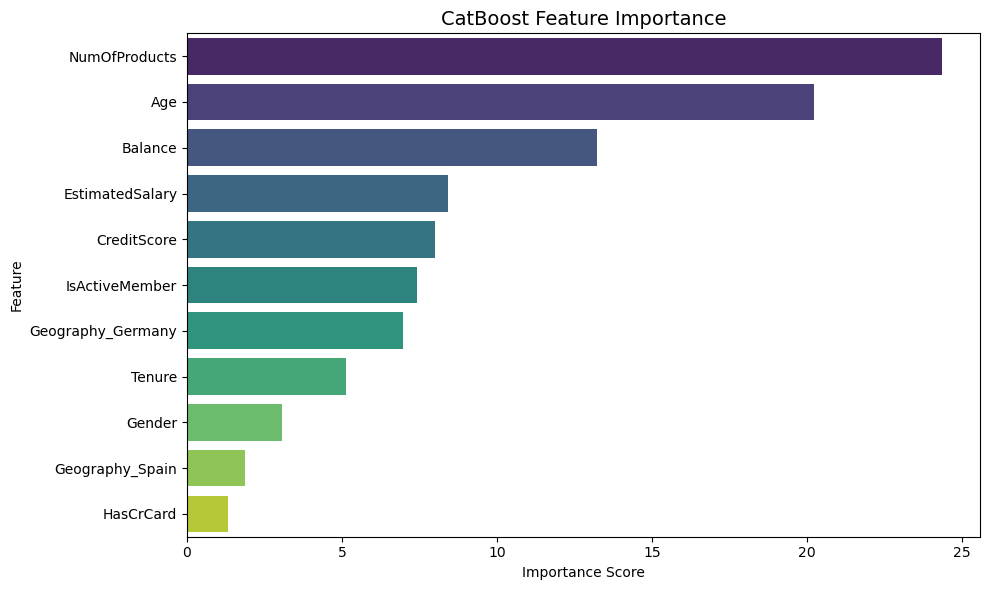

,Feature,Importance
5,NumOfProducts,24.355319
2,Age,20.230014
4,Balance,13.225145
8,EstimatedSalary,8.429479
0,CreditScore,8.003399
7,IsActiveMember,7.430020
9,Geography_Germany,6.978073
3,Tenure,5.123878
1,Gender,3.064307
10,Geography_Spain,1.855057


In [46]:

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': cat_model.get_feature_importance()
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance', 
    y='Feature', 
    data=feature_importances, 
    palette='viridis'
)
plt.title("CatBoost Feature Importance", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Display the importance table
feature_importances





<div style="background-color:#6A040F; padding:18px; border-radius:10px; color:white; margin-top:25px;">
    <h2>🔍 SHAP Açıklanabilirlik (Explainability) – CatBoost</h2>
    <p>
        SHAP, her bir özelliğin model tahminine ne kadar ve hangi yönde katkıda bulunduğunu 
        gösteren güçlü bir açıklanabilirlik yöntemidir.  
        Finans sektöründe şeffaflık, yorumlanabilirlik ve regülasyon uyumu açısından 
        büyük önem taşır.  
        SHAP, modelin churn tahminlerini <strong>neden</strong> yaptığını net biçimde anlamayı sağlar.
    </p>
</div>


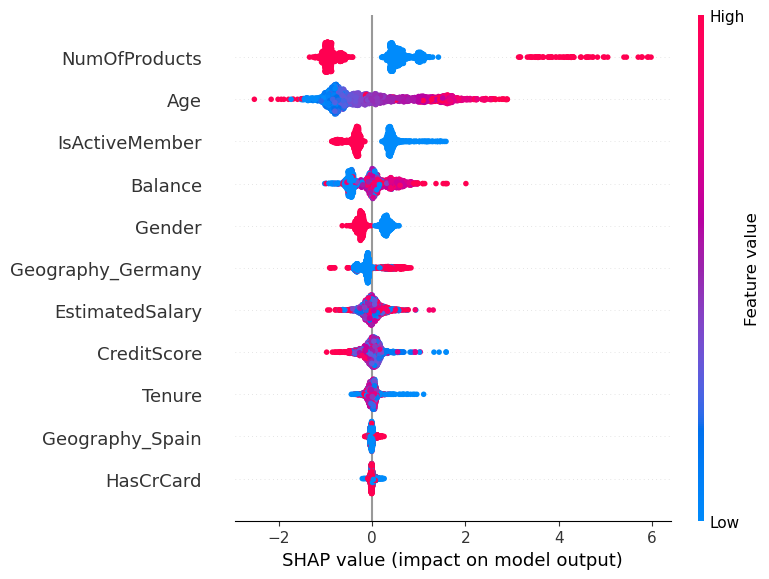

In [47]:

explainer = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(X_test)


if isinstance(shap_values, list):
    shap_values = shap_values[1]

shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

<div style="background-color:#2D6A4F; padding:18px; border-radius:10px; color:white; margin-top:25px;">
    <h2>💾 Kapanış ve Kayıt (Export) – Final Model Çıktıları</h2>
    <p>
        Bu bölümde, eğitilmiş <strong>final CatBoost modeli</strong> ve test seti üzerindeki 
        <strong>tahmin sonuçları</strong> dosyaya kaydedilir. Böylece model, daha sonra yeniden eğitmeye 
        gerek kalmadan tekrar kullanılabilir (deployment / inference) ve çıktı dosyaları 
        raporlama amaçlı incelenebilir.
    </p>
    <ul>
        <li><strong>catboost_final_model.joblib</strong>: Eğitilmiş final model dosyası</li>
        <li><strong>catboost_final_test_predictions.csv</strong>: Test seti tahminleri (y_true, y_pred, y_prob)</li>
        <li><strong>catboost_best_params.csv</strong>: CV / tuning sonucu en iyi parametreler</li>
    </ul>
    <p style="margin-bottom:0;">
        ✅ Bu kayıt adımından sonra proje teknik olarak tamamlanmış olur. İsteğe bağlı olarak 
        yeni veri üzerinde tahmin almak için model dosyası tekrar yüklenebilir.
    </p>
</div>


In [ ]:

pred_df = X_test.copy()
pred_df["y_true"] = y_test.values if hasattr(y_test, "values") else y_test
pred_df["y_pred"] = y_pred_final
pred_df["y_prob_exited"] = y_prob_final

pred_df.to_csv("catboost_final_test_predictions.csv", index=False)
print("\n✅ Saved:", "catboost_final_test_predictions.csv")

joblib.dump(final_model, "catboost_final_model.joblib")
print("✅ Saved:", "catboost_final_model.joblib")

pd.DataFrame([rs.best_params_]).to_csv("catboost_best_params.csv", index=False)
print("✅ Saved:", "catboost_best_params.csv")


✅ Saved: catboost_final_test_predictions.csv
✅ Saved: catboost_final_model.joblib
✅ Saved: catboost_best_params.csv
